In [1]:
#importing the necessary libraries

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn import datasets

In [2]:
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,-0.307804,0.043452
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,0.080642,0.033042
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,0.279174,-0.020464
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,0.927471,-0.174720
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,0.042228,-0.062721


In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [6]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [7]:
Y_pred = classifier.predict(X_test) 

In [8]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[39,  4],
       [ 2, 69]], dtype=int64)

In [9]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9473684210526315
Precision: 0.9452054794520548
Recall: 0.971830985915493


Text(0.5, 257.44, 'Predicted label')

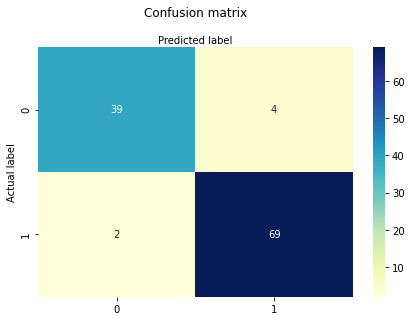

In [10]:
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [11]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1)
# targets = [0,1]
# colors = ['r','g']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf[0] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
#         , finalDf.loc[indicesToKeep, 'pc2'],
#          c = color
#         , s = 50)
# ax.legend(targets)
# ax.grid()